<a href="https://colab.research.google.com/github/FilippMaksimov/SPSU.DynamicSystems/blob/main/DynSys02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

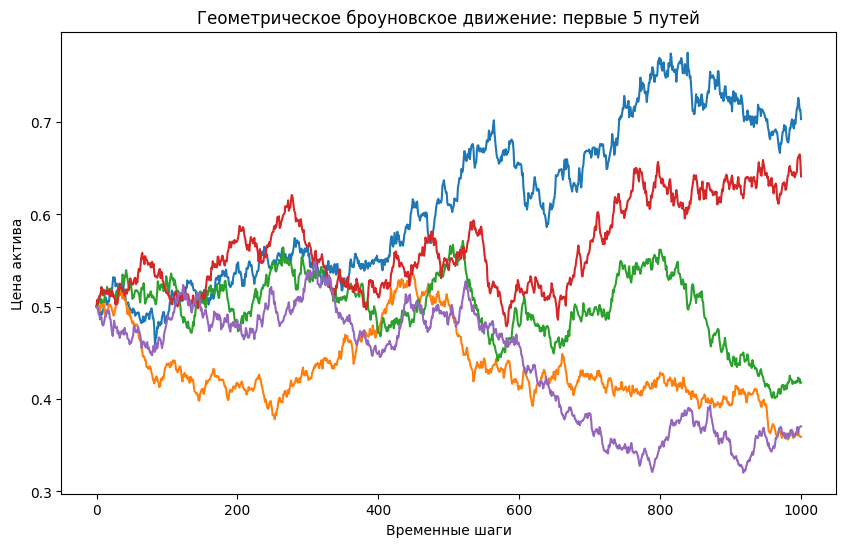

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для симуляции геометрического броуновского движения
def simulate_gbm(S0, r, sigma, T, num_paths, time_steps):
    np.random.seed(42)
    dt = T / time_steps
    S = np.zeros((num_paths, time_steps + 1))
    S[:, 0] = S0  # начальная цена
    for t in range(1, time_steps + 1):
        z = np.random.normal(0, 1, num_paths)  # стандартное нормальное распределение
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Параметры
S0 = 0.5  # начальная цена
r = 0.1   # безрисковая процентная ставка
sigma = 0.3  # волатильность
T = 1.0  # срок действия контракта
num_paths = 100  # количество симулируемых путей
time_steps = 1000  # количество временных шагов

# Генерация путей
S = simulate_gbm(S0, r, sigma, T, num_paths, time_steps)

# Отображение первых 5 путей
plt.figure(figsize=(10, 6))
plt.plot(S[:5].T)
plt.title("Геометрическое броуновское движение: первые 5 путей")
plt.xlabel("Временные шаги")
plt.ylabel("Цена актива")
plt.show()

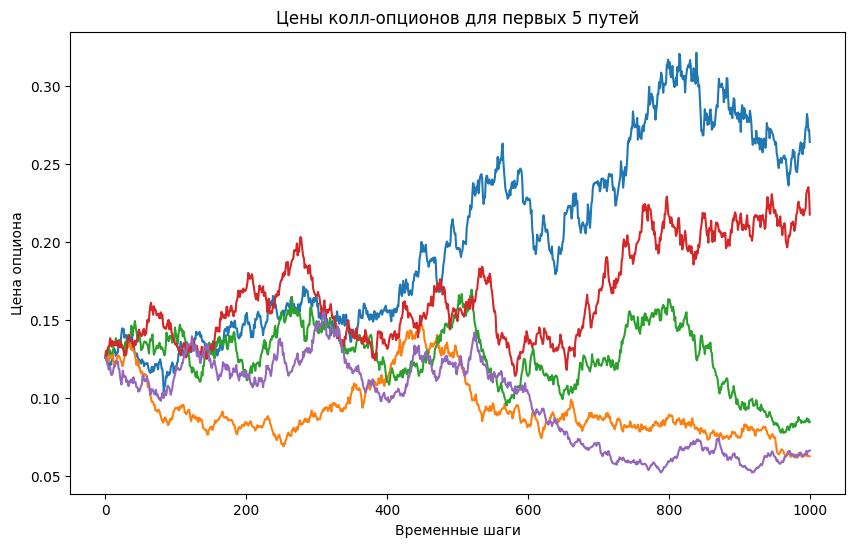

In [ ]:
from scipy.stats import norm

# Функция для расчета цен колл-опционов
def calculate_call_option(S, K, r, T, sigma, delta):
    noise = np.random.uniform(0, 0.3)
    C = np.zeros(S.shape)
    d1 = np.log(S / K) + (r + 0.5 * sigma**2) * (T / (sigma * np.sqrt(T)))
    d2 = d1 - sigma * np.sqrt(T)
    C = S * np.exp(-delta * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2) + noise
    return C

# Параметры опциона
K = 0.6  # страйк
delta = 1 / 1000  # шаг по времени

# Расчет цен на опционы для всех путей
C = calculate_call_option(S, K, r, T, sigma, delta)

# Отображение первых 5 цен на опционы
plt.figure(figsize=(10, 6))
plt.plot(C[:5].T)
plt.title("Цены колл-опционов для первых 5 путей")
plt.xlabel("Временные шаги")
plt.ylabel("Цена опциона")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающие и тестовые
def cross_validate(S, C, train_size_list, iterations = 1000):
    results = []
    for train_size in train_size_list:
        # Разделяем данные
        X_train, X_test, y_train, y_test = train_test_split(S, C, train_size=train_size, shuffle=False)

        # Линейная регрессия
        model_lr = LinearRegression()
        model_lr.fit(X_train, y_train)
        y_pred_lr = model_lr.predict(X_test)
        mse_lr = mean_squared_error(y_test, y_pred_lr)

        # Нейронная сеть
        model_nn = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=iterations, random_state=42)
        model_nn.fit(X_train, y_train)
        y_pred_nn = model_nn.predict(X_test)
        mse_nn = mean_squared_error(y_test, y_pred_nn)

        # Метод динамических систем (предположим, что это ваш метод)
        # Вместо этого используем текущие данные как гипотетический прогноз
        y_pred_dyn_sys = y_train.mean() * np.ones_like(y_test)
        mse_dyn_sys = mean_squared_error(y_test, y_pred_dyn_sys)

        # Сохраняем результаты
        results.append([mse_lr, mse_nn, mse_dyn_sys])

    return results

# Объемы обучающих данных
train_size_list = [0.2, 0.4, 0.6, 0.8]

# Кросс-валидация
results = cross_validate(S, C, train_size_list)

# Печать результатов
for i, train_size in enumerate(train_size_list):
    print(f"Train size {train_size}: Linear Regression: {results[i][0]:.5f}, "
          f"Neural Network: {results[i][1]:.5f}, Dynamic System: {results[i][2]:.5f}")


Train size 0.2: Linear Regression: 0.00041, Neural Network: 0.00446, Dynamic System: 0.00557
Train size 0.4: Linear Regression: 0.00025, Neural Network: 0.00405, Dynamic System: 0.00542
Train size 0.6: Linear Regression: 0.00023, Neural Network: 0.00393, Dynamic System: 0.00524
Train size 0.8: Linear Regression: 0.00022, Neural Network: 0.00376, Dynamic System: 0.00493


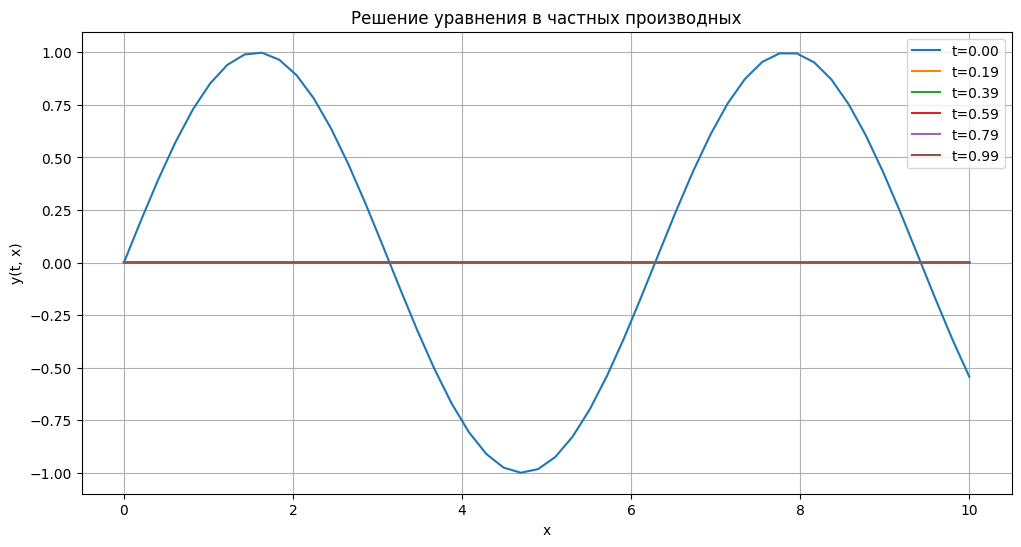

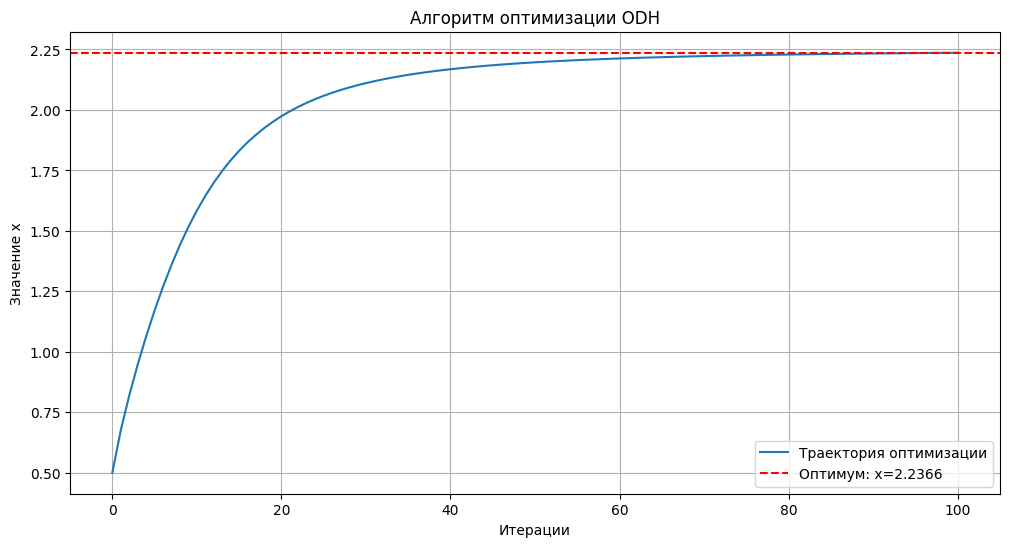

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 1. Пример с одномерной моделью
# Определяем параметры задачи
x_min, x_max = 0, 10
p = 50  # Количество точек
x = np.linspace(x_min, x_max, p)
dx = x[1] - x[0]

def partial_differential_equation_discrete(t_steps, x, dt, mu, sigma, r, f):
    """
    Дискретизация уравнения:
    y_i^{k+1} = a_i^k y_{i-1}^k + b_i^k y_i^k + c_i^k y_{i+1}^k
    """
    n = len(x)
    y = np.zeros((t_steps, n))

    # Начальные условия
    y[0, :] = np.sin(x)  # Можно заменить на любые другие начальные условия

    for k in range(t_steps - 1):
        for i in range(1, n - 1):
            a_i = dt * (0.5 * sigma**2 / dx**2 - mu / (2 * dx))
            b_i = dt * (1 + f / y[k, i] - sigma**2 / dx**2 - r)
            c_i = dt * (0.5 * sigma**2 / dx**2 + mu / (2 * dx))

            y[k + 1, i] = a_i * y[k, i - 1] + b_i * y[k, i] + c_i * y[k, i + 1]

    return y

# Параметры для дискретизации
mu = 0.1
sigma = 0.2
r = 0.05
f = 0.01
t_max = 1
t_steps = 100
dt = t_max / t_steps

# Решение уравнения
solution = partial_differential_equation_discrete(t_steps, x, dt, mu, sigma, r, f)

# Визуализация решения
plt.figure(figsize=(12, 6))
time_indices = np.linspace(0, t_steps - 1, 6, dtype=int)
for t_idx in time_indices:
    plt.plot(x, solution[t_idx, :], label=f"t={t_idx * dt:.2f}")
plt.title("Решение уравнения в частных производных")
plt.xlabel("x")
plt.ylabel("y(t, x)")
plt.legend()
plt.grid()
plt.show()

# 2. Алгоритм оптимизации с шагом ODH
# Пример градиентного спуска с оптимизированным шагом

def objective_function(x):
    return x**4 - 3 * x**3 + 2  # Пример функции

def gradient(x):
    return 4 * x**3 - 9 * x**2  # Производная функции

def optimize_odm(x0, learning_rate, tol, max_iter):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        if abs(grad) < tol:
            break

        # ODH шаг: корректируем по текущему градиенту
        step_size = learning_rate / (1 + _)
        x -= step_size * grad
        history.append(x)

    return x, history

# Оптимизация
x0 = 0.5  # Начальная точка
learning_rate = 0.1
tol = 1e-6
max_iter = 100

optimal_x, x_history = optimize_odm(x0, learning_rate, tol, max_iter)

# Визуализация оптимизации
plt.figure(figsize=(12, 6))
plt.plot(x_history, label="Траектория оптимизации")
plt.axhline(y=optimal_x, color='r', linestyle='--', label=f"Оптимум: x={optimal_x:.4f}")
plt.title("Алгоритм оптимизации ODH")
plt.xlabel("Итерации")
plt.ylabel("Значение x")
plt.legend()
plt.grid()
plt.show()

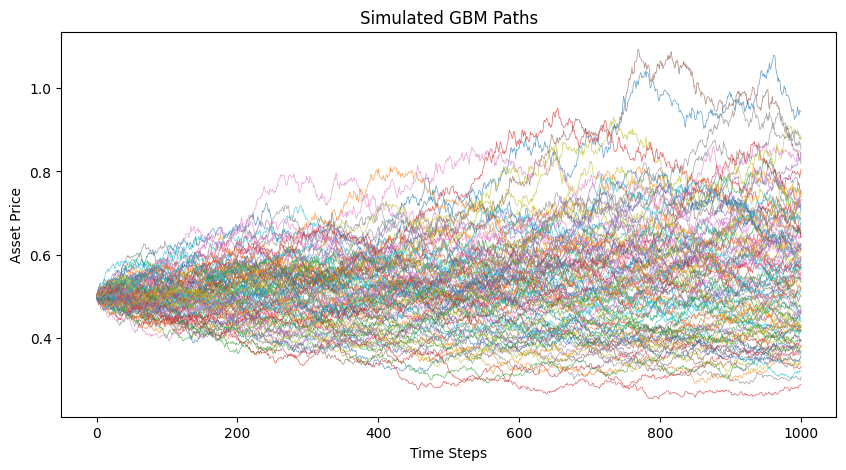

Iteration 1, Cost: 85.969602
Iteration 101, Cost: 74.515438
Iteration 201, Cost: 64.766133
Iteration 301, Cost: 56.467125
Iteration 401, Cost: 49.401983
Iteration 501, Cost: 43.386671
Iteration 601, Cost: 38.264691
Iteration 701, Cost: 33.902947
Iteration 801, Cost: 30.188233
Iteration 901, Cost: 27.024256
Optimized Coefficients:
a: [ 5.00822693e-01  6.94632065e-01  1.50961074e-01  5.86600607e-01
  7.33426026e-01  4.36297979e-01 -1.67826989e-02  2.90706506e-01
  3.28317558e-01  1.89277217e-01  8.19845059e-01  5.71428153e-01
  4.52510720e-01  3.03210849e-01  5.57722836e-01  5.10642079e-01
  3.52304163e-01  5.66186976e-01  4.05290434e-02  4.89254777e-02
  1.47822671e-01  2.12403093e-01  6.92634845e-01  6.47175896e-01
  4.14240505e-01  2.49765709e-01  7.58276441e-01  4.77863018e-01
  2.85907537e-01  5.01740988e-01 -9.01184981e-03  7.35129396e-01
  3.22664273e-01  5.91562248e-01  5.56468817e-01  6.03302698e-01
  8.43247198e-01  1.86218703e-01  2.38135346e-01  1.26007509e-01
  5.17425223e-0

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to simulate Geometric Brownian Motion (GBM)
def simulate_gbm(S0, r, sigma, T, num_paths, time_steps):
    np.random.seed(42)
    dt = T / time_steps
    S = np.zeros((num_paths, time_steps + 1))
    S[:, 0] = S0
    for t in range(1, time_steps + 1):
        z = np.random.normal(0, 1, num_paths)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return S

# Function to calculate call option prices
def calculate_call_option(S, K, r, T, delta):
    noise = np.random.uniform(0, 0.3, S.shape)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S * np.exp(-delta * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2) + noise
    return C

# Gradient descent optimization
def optimize_coefficients(y, dt, dx, max_iterations=1000, epsilon=1e-6):
    num_points = y.shape[1]
    a = np.random.rand(num_points - 2)
    b = np.random.rand(num_points - 2)
    c = np.random.rand(num_points - 2)

    for iteration in range(max_iterations):
        grad_a, grad_b, grad_c = np.zeros_like(a), np.zeros_like(b), np.zeros_like(c)
        cost = 0

        for k in range(y.shape[0] - 1):
            for i in range(1, num_points - 1):
                residual = a[i - 1] * y[k, i - 1] + b[i - 1] * y[k, i] + c[i - 1] * y[k, i + 1] - y[k + 1, i]
                grad_a[i - 1] += residual * y[k, i - 1]
                grad_b[i - 1] += residual * y[k, i]
                grad_c[i - 1] += residual * y[k, i + 1]
                cost += residual**2

        grad_a /= y.shape[0] - 1
        grad_b /= y.shape[0] - 1
        grad_c /= y.shape[0] - 1
        cost /= 2 * (y.shape[0] - 1)

        a -= dt * grad_a
        b -= dt * grad_b
        c -= dt * grad_c

        if cost < epsilon:
            print(f"Converged at iteration {iteration + 1}")
            break

        if iteration % 100 == 0:
            print(f"Iteration {iteration + 1}, Cost: {cost:.6f}")

    return a, b, c

# Parameters
S0 = 0.5
K = 0.6
r = 0.1
sigma = 0.3
T = 1
delta = 1/1000
num_paths = 100
time_steps = 1000

# Simulate data
S = simulate_gbm(S0, r, sigma, T, num_paths, time_steps)
C = calculate_call_option(S, K, r, T, delta)

# Visualize generated data
plt.figure(figsize=(10, 5))
plt.plot(S.T, lw=0.5, alpha=0.7)
plt.title("Simulated GBM Paths")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.show()

# Optimize coefficients for a single path
y = S[:10, :]  # Using first 10 paths for simplicity
dt = T / time_steps
dx = 1 / (S.shape[1] - 1)
a, b, c = optimize_coefficients(y, dt, dx)

print("Optimized Coefficients:")
print("a:", a)
print("b:", b)
print("c:", c)